# Méthodes classiques de classification 

## utilisation de la méthide TF-IDF pour la véctprisation 

## Bibliotheques 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix, roc_auc_score, roc_curve 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from joblib import load

## Utilisation de la méthodes TF-IDF pour générer les tableaux vectorisés

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv('news/filtred_tokened_data.csv')

x_train, x_test, y_train, y_test = train_test_split(df['tokens'], df['label'], test_size=0.30, random_state=50)

tfidf_vectorizer=TfidfVectorizer(use_idf=True)

# on vectorise x_train
tfidf_x_train=tfidf_vectorizer.fit_transform(x_train).toarray()

# on vectorise y_train
tfidf_x_test=tfidf_vectorizer.transform(x_test)


In [3]:
print(tfidf_x_train.shape)
print(tfidf_x_test.shape[0])

print(y_train.shape)
print(y_train.shape[0])


(31428, 100047)
13470
(31428,)
31428


#  Evaluation de plusieurs méthodes de classification basées sur la régression 

## 1- La méthode de l'Agressivité Passive

In [4]:
# C 
model = PassiveAggressiveClassifier(C = 0.1, 
                                    random_state = 30,
                                    early_stopping=True,# we arret tot possible.
                                    n_iter_no_change=10, #nb iter
                                    verbose=True,
                                    loss='hinge', #fonction cout
                                   )

In [5]:
#on entraine le model sur les données d'entrainement.
history = model.fit(tfidf_x_train,y_train)

-- Epoch 1
Norm: 31.08, NNZs: 58294, Bias: 0.482305, T: 28285, Avg. loss: 0.162935
Total training time: 3.46 seconds.
-- Epoch 2
Norm: 37.00, NNZs: 58913, Bias: 0.419411, T: 56570, Avg. loss: 0.047814
Total training time: 6.83 seconds.
-- Epoch 3
Norm: 40.80, NNZs: 59008, Bias: 0.488176, T: 84855, Avg. loss: 0.031003
Total training time: 10.30 seconds.
-- Epoch 4
Norm: 43.49, NNZs: 59120, Bias: 0.338598, T: 113140, Avg. loss: 0.022118
Total training time: 13.60 seconds.
-- Epoch 5
Norm: 45.58, NNZs: 59148, Bias: 0.473110, T: 141425, Avg. loss: 0.016905
Total training time: 16.88 seconds.
-- Epoch 6
Norm: 47.20, NNZs: 59186, Bias: 0.448395, T: 169710, Avg. loss: 0.013157
Total training time: 20.15 seconds.
-- Epoch 7
Norm: 48.58, NNZs: 59224, Bias: 0.547808, T: 197995, Avg. loss: 0.010547
Total training time: 23.38 seconds.
-- Epoch 8
Norm: 49.72, NNZs: 59237, Bias: 0.178789, T: 226280, Avg. loss: 0.008534
Total training time: 26.56 seconds.
-- Epoch 9
Norm: 50.69, NNZs: 59271, Bias: 0.

In [6]:
#optention des prédictions de ce modèle.
y_pred=model.predict(tfidf_x_test)

#### Evaluation de la méthode 

In [7]:
model.score(tfidf_x_test, y_test)

0.9955456570155902

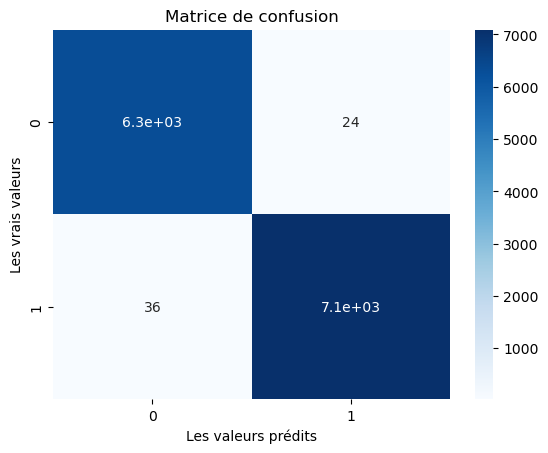

In [8]:
#creation de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

#représentation graphique du résultat du meilleure model
sns.heatmap(cm, annot=True,cmap='Blues')
plt.xlabel('Les valeurs prédits')
plt.ylabel('Les vrais valeurs')
plt.title('Matrice de confusion')
plt.show()

# 2- La méthode de la Regression Logistique 

In [9]:
# Définir un callback pour afficher les performances à chaque étape
class TrainingProgressCallback:
    def __init__(self):
        self.step = 0

    def __call__(self, estimator, args):
        self.step += 1
        train_accuracy = accuracy_score(y_train, estimator.predict(X_train))
        test_accuracy = accuracy_score(y_test, estimator.predict(X_test))
        print(f'Étape {self.step}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}')

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', 
                           random_state =50, 
                           C=1.0,
                           tol=0.01, 
                           solver='liblinear',
                           max_iter=10)


model.fit(tfidf_x_train,y_train)

LogisticRegression(max_iter=10, random_state=50, solver='liblinear', tol=0.01)

In [11]:
y_pred=model.predict(tfidf_x_test)


In [12]:
#### Evaluation de la méthode 

In [13]:
model.score(tfidf_x_test, y_test)

0.9893095768374165

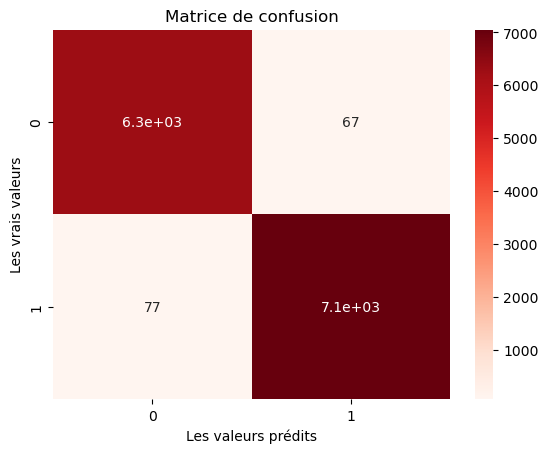

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6341
           1       0.99      0.99      0.99      7129

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [14]:
#creation de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

#représentation graphique du résultat du meilleure model
sns.heatmap(cm, annot=True,cmap='Reds')
plt.xlabel('Les valeurs prédits')
plt.ylabel('Les vrais valeurs')
plt.title('Matrice de confusion')
plt.show()
print(classification_report(y_test, y_pred))

# 3- La méthode de l'Arbre de Décision

In [15]:
model = DecisionTreeClassifier(random_state=50,
                               criterion='gini', 
                               max_depth=3, 
                               min_samples_split=2)
                             
#callback = TrainingProgressCallback()
model.fit(tfidf_x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=50)

In [16]:
y_pred=model.predict(tfidf_x_test)

In [17]:
model.score(tfidf_x_test, y_test)

0.9951002227171493

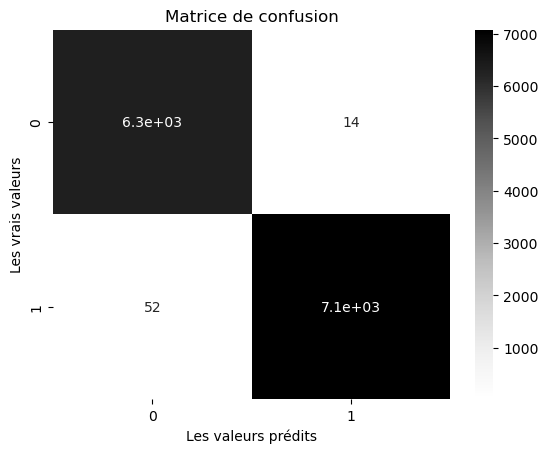

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6341
           1       1.00      0.99      1.00      7129

    accuracy                           1.00     13470
   macro avg       0.99      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [18]:
#creation de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

#représentation graphique du résultat du meilleure model
sns.heatmap(cm, annot=True,cmap='Greys')
plt.xlabel('Les valeurs prédits')
plt.ylabel('Les vrais valeurs')
plt.title('Matrice de confusion')
plt.show()
print(classification_report(y_test, y_pred))

## 4- Gradient Boosting Classifier¶

In [19]:
from sklearn.ensemble import GradientBoostingClassifier



model = GradientBoostingClassifier(random_state=50, verbose=0, learning_rate=0.1, max_depth=3)
#callback = TrainingProgressCallback()
model.fit(tfidf_x_train,y_train)

KeyboardInterrupt: 

In [ ]:
y_pred=model.predict(tfidf_x_test)

In [ ]:
model.score(tfidf_x_test, y_test)

In [ ]:
#creation de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

#représentation graphique du résultat du meilleure model
sns.heatmap(cm, annot=True,cmap='Greens')
plt.xlabel('Les valeurs prédits')
plt.ylabel('Les vrais valeurs')
plt.title('Matrice de confusion')
plt.show()
print(classification_report(y_test, y_pred))

## 5- Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=50)
model.fit(tfidf_x_train,y_train)

In [ ]:
y_pred=model.predict(tfidf_x_test)

In [ ]:
model.score(tfidf_x_test, y_test)

In [ ]:
#creation de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

#représentation graphique du résultat du meilleure model
sns.heatmap(cm, annot=True,cmap='Oranges')
plt.xlabel('Les valeurs prédits')
plt.ylabel('Les vrais valeurs')
plt.title('Matrice de confusion')
plt.show()
print(classification_report(y_test, y_pred))